In [5]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Drop the EIN AND NAME columns 
application_df= application_df.drop(columns=["EIN","NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
# Determine the number of unique values in each column 
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
app_col=application_df["APPLICATION_TYPE"].value_counts()
app_col

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

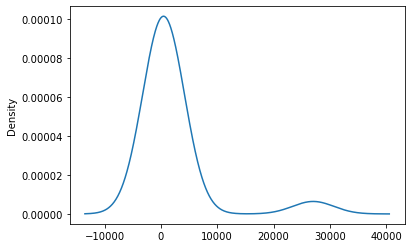

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_df["APPLICATION_TYPE"].value_counts().plot.density()

In [9]:
# Replace Bins into dataframe- APPLICATION
replace_app= app_col[app_col < 800].index.tolist()

for app in replace_app:
    application_df.APPLICATION_TYPE= application_df.APPLICATION_TYPE.replace(app,"Other")
    
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Check CLASSIFICATION Column
classification_col= application_df["CLASSIFICATION"].value_counts()
classification_col.head(50)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C4100        6
C1720        6
C2400        6
C1257        5
C1600        5
C0           3
C1260        3
C2710        3
C1256        2
C1267        2
C1246        2
C3200        2
C1234        2
C1570        1
C2561        1
C1370        1
C1732        1
C2150        1
Name: CLASSIFICATION, dtype: int64

In [11]:
# Replace Bins into dataframe- CLASSIFICATION
replace_class= classification_col[classification_col<800].index.tolist()

for clase in replace_class:
    application_df.CLASSIFICATION=application_df.CLASSIFICATION.replace(clase, "Other")
    
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists 
application_cgl=application_df.dtypes[application_df.dtypes=="object"].index.tolist()
application_df[application_cgl].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [13]:
# Create a OneHotEncoder instance 
enc= OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder unsing categorical list 
encode_df= pd.DataFrame(enc.fit_transform(application_df[application_cgl]))

# Add the encoded variable names to the dataframe 
encode_df.columns= enc.get_feature_names(application_cgl)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge One-Hot encoded features and drop the originals
prep_application_df= application_df.merge(encode_df,left_index=True, right_index=True).drop(columns= application_cgl)
prep_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Attempt # 1 
### Drop Noisy Features, 2 Hidden Layers(80, 30 neurons)

In [15]:
# Going to delete columns that are unnecessary and run NN
print(len(prep_application_df.columns))

41


In [16]:
prep_application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
 

In [17]:
# Going to Drop the following:
temp_application_df= prep_application_df.drop(columns= ["USE_CASE_Other","AFFILIATION_Other"])
temp_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Split the preprocessed data 
y=temp_application_df["IS_SUCCESSFUL"].values
X=temp_application_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state= 3)

In [19]:
# Create StandArdScaler 
scaler= StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data 
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3120      
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 81        
Total params: 9,681
Trainable params: 9,681
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model 
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create callback that saves every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

#Evaluate results
model_loss, model_accuracy= nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5729 - accuracy: 0.7215
Epoch 2/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5600 - accuracy: 0.7284
Epoch 3/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5572 - accuracy: 0.7301
Epoch 4/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5544 - accuracy: 0.7304
Epoch 5/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5537 - accuracy: 0.7315
Epoch 6/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5527 - accuracy: 0.7316
Epoch 7/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5518 - accuracy: 0.7329
Epoch 8/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5505 - accuracy: 0.7332
Epoch 9/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5507 - accuracy: 0.7323
Epoch 10/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5502 - accura

858/858 [==============================] - 3s 4ms/step - loss: 0.5406 - accuracy: 0.7383
Epoch 82/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5399 - accuracy: 0.7392
Epoch 83/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5399 - accuracy: 0.7393
Epoch 84/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5399 - accuracy: 0.7385
Epoch 85/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5398 - accuracy: 0.7388
Epoch 86/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5393 - accuracy: 0.7389
Epoch 87/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5399 - accuracy: 0.7381
Epoch 88/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5400 - accuracy: 0.7390
Epoch 89/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5395 - accuracy: 0.7385
Epoch 90/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5395 - accuracy: 

858/858 [==============================] - 3s 3ms/step - loss: 0.5377 - accuracy: 0.7395
Epoch 161/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5379 - accuracy: 0.7390
Epoch 162/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5379 - accuracy: 0.7395
Epoch 163/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5374 - accuracy: 0.7400
Epoch 164/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5396 - accuracy: 0.7400
Epoch 165/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5384 - accuracy: 0.7383
Epoch 166/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5376 - accuracy: 0.7396
Epoch 167/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5378 - accuracy: 0.7393
Epoch 168/200
858/858 [==============================] - 3s 3ms/step - loss: 0.5375 - accuracy: 0.7396
Epoch 169/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5374 - a

# Attempt 2 
### 3 Hidden Layers(80, 30,15 neurons)

In [36]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
hidden_node3= 15

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn2.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 80)                3280      
_________________________________________________________________
dense_24 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_25 (Dense)             (None, 15)                1215      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 16        
Total params: 10,991
Trainable params: 10,991
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model 
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn2.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5728 - accuracy: 0.7217
Epoch 2/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5572 - accuracy: 0.7307
Epoch 3/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5554 - accuracy: 0.7310
Epoch 4/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5528 - accuracy: 0.7322
Epoch 5/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5528 - accuracy: 0.7314
Epoch 6/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5516 - accuracy: 0.7327
Epoch 7/200
858/858 [==============================] - 5s 6ms/step - loss: 0.5511 - accuracy: 0.7330
Epoch 8/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5510 - accuracy: 0.7333
Epoch 9/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5501 - accuracy: 0.7337
Epoch 10/200
858/858 [==============================] - 5s 5ms/step - loss: 0.5491 - accura

858/858 [==============================] - 4s 5ms/step - loss: 0.5390 - accuracy: 0.7386
Epoch 82/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5390 - accuracy: 0.7388
Epoch 83/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5386 - accuracy: 0.7387
Epoch 84/200
858/858 [==============================] - 5s 5ms/step - loss: 0.5386 - accuracy: 0.7400
Epoch 85/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5388 - accuracy: 0.7389
Epoch 86/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5391 - accuracy: 0.7391
Epoch 87/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5393 - accuracy: 0.7396
Epoch 88/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5383 - accuracy: 0.7387
Epoch 89/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5387 - accuracy: 0.7398
Epoch 90/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5386 - accuracy: 

858/858 [==============================] - 3s 4ms/step - loss: 0.5372 - accuracy: 0.7395
Epoch 161/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5375 - accuracy: 0.7397
Epoch 162/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5379 - accuracy: 0.7395
Epoch 163/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5370 - accuracy: 0.7389
Epoch 164/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5367 - accuracy: 0.7398
Epoch 165/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5373 - accuracy: 0.7391
Epoch 166/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5367 - accuracy: 0.7403
Epoch 167/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5367 - accuracy: 0.7403
Epoch 168/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5370 - accuracy: 0.7397
Epoch 169/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5373 - a

# Attempt # 3
### Back to original data, and redistributed neurons


In [28]:
# Split the preprocessed data 
y=prep_application_df["IS_SUCCESSFUL"].values
X=prep_application_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state= 3)

In [29]:
# Create StandArdScaler 
scaler= StandardScaler()

# Fit the StandardScaler
X_scaler= scaler.fit(X_train)

# Scale the data 
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 35
hidden_node3=10

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn3.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 80)                3280      
_________________________________________________________________
dense_28 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                810       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 10,581
Trainable params: 10,581
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model 
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn3.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5781 - accuracy: 0.7186
Epoch 2/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5592 - accuracy: 0.7298
Epoch 3/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5567 - accuracy: 0.7295
Epoch 4/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5550 - accuracy: 0.7311
Epoch 5/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5539 - accuracy: 0.7303
Epoch 6/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5529 - accuracy: 0.7318
Epoch 7/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5522 - accuracy: 0.7320
Epoch 8/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5513 - accuracy: 0.7315
Epoch 9/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5504 - accuracy: 0.7332
Epoch 10/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5506 - accura

858/858 [==============================] - 3s 4ms/step - loss: 0.5396 - accuracy: 0.7394
Epoch 82/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5395 - accuracy: 0.7381
Epoch 83/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5395 - accuracy: 0.7397
Epoch 84/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5393 - accuracy: 0.7392
Epoch 85/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5399 - accuracy: 0.7383
Epoch 86/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5395 - accuracy: 0.7388
Epoch 87/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5391 - accuracy: 0.7393
Epoch 88/200
858/858 [==============================] - 5s 5ms/step - loss: 0.5396 - accuracy: 0.7381
Epoch 89/200
858/858 [==============================] - 5s 5ms/step - loss: 0.5392 - accuracy: 0.7397
Epoch 90/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5391 - accuracy: 

858/858 [==============================] - 4s 5ms/step - loss: 0.5373 - accuracy: 0.7395
Epoch 161/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5375 - accuracy: 0.7402
Epoch 162/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5372 - accuracy: 0.7399
Epoch 163/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5373 - accuracy: 0.7400
Epoch 164/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5374 - accuracy: 0.7397
Epoch 165/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5369 - accuracy: 0.7399
Epoch 166/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5372 - accuracy: 0.7392
Epoch 167/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5367 - accuracy: 0.7402
Epoch 168/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5371 - accuracy: 0.7401
Epoch 169/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5372 - a

# Attempt 4
## Changed activation functions 

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
hidden_nodes3=15
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="sigmoid"))

# Third Hidden Layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes3, activation="sigmoid"))

# Output layer
nn4.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 80)                3280      
_________________________________________________________________
dense_32 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_33 (Dense)             (None, 15)                1215      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 16        
Total params: 10,991
Trainable params: 10,991
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model 
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn4.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn4.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
858/858 [==============================] - 4s 5ms/step - loss: 0.5786 - accuracy: 0.7142
Epoch 2/100
858/858 [==============================] - 5s 5ms/step - loss: 0.5603 - accuracy: 0.7295
Epoch 3/100
858/858 [==============================] - 4s 5ms/step - loss: 0.5574 - accuracy: 0.7295
Epoch 4/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5555 - accuracy: 0.7292
Epoch 5/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5544 - accuracy: 0.7304
Epoch 6/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5533 - accuracy: 0.7310
Epoch 7/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5520 - accuracy: 0.7319
Epoch 8/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5518 - accuracy: 0.7330
Epoch 9/100
858/858 [==============================] - 4s 5ms/step - loss: 0.5511 - accuracy: 0.7334
Epoch 10/100
858/858 [==============================] - 4s 5ms/step - loss: 0.5507 - accura

858/858 [==============================] - 3s 4ms/step - loss: 0.5385 - accuracy: 0.7385
Epoch 82/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5381 - accuracy: 0.7389
Epoch 83/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5381 - accuracy: 0.7390
Epoch 84/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5380 - accuracy: 0.7388
Epoch 85/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5378 - accuracy: 0.7394
Epoch 86/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5381 - accuracy: 0.7387
Epoch 87/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5380 - accuracy: 0.7388
Epoch 88/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5378 - accuracy: 0.7385
Epoch 89/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5379 - accuracy: 0.7392
Epoch 90/100
858/858 [==============================] - 3s 4ms/step - loss: 0.5378 - accuracy: 

In [43]:
# Export our model to HDF5 file
nn2.save("AlphabetSoupCharity_optimzation.h5")